Se importan las librerias a usar y adeamas se inicia la base de datos en la memoria

In [1]:
from sqlalchemy import create_engine  
from sqlalchemy.sql import select
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
engine = create_engine('sqlite:///:memory:', echo=True)

Se crean las diferentes tablas a usar:

In [2]:
from sqlalchemy import Table, Column, Integer, Float,String, MetaData, ForeignKey

metadata = MetaData()
libros = Table('Libros', metadata,
                Column('id', Integer, primary_key=True),
                Column('titulo', String),
                Column('autor', Integer,ForeignKey('Autores.id_autor')),
                Column('calificacion',Integer),
                Column('genero',Integer,ForeignKey('Genero.id_genero')),
                Column('comentario',String))

In [3]:
autor= Table ('Autores',metadata,
             Column('id_autor',Integer,primary_key = True),
             Column('Nombre',String),
             Column('Apellido',String),
             Column('promedio',Float),
             Column('genero',Integer,ForeignKey('Genero.id_genero')))

In [4]:
genero= Table('Genero',metadata,
             Column('id_genero',Integer,primary_key= True,autoincrement='ignore_fk'),
             Column('nombre',String),
             Column('promedio',Float))

Se muestra los diferentes campos de la tabla libros:

In [5]:
for c in libros.c:
    print(c)

Libros.id
Libros.titulo
Libros.autor
Libros.calificacion
Libros.genero
Libros.comentario


Se muestra los diferentes campos de la tabla autor:

In [6]:
for c in autor.c:
    print(c)

Autores.id_autor
Autores.Nombre
Autores.Apellido
Autores.promedio
Autores.genero


Se muestra los diferentes campos de la tabla genero:

In [7]:
for c in genero.c:
    print(c)

Genero.id_genero
Genero.nombre
Genero.promedio


Se crean las tablas en la base de datos:

In [8]:
metadata.create_all(engine)
metadata.tables

2019-06-04 22:55:10,447 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-06-04 22:55:10,456 INFO sqlalchemy.engine.base.Engine ()
2019-06-04 22:55:10,467 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-06-04 22:55:10,477 INFO sqlalchemy.engine.base.Engine ()
2019-06-04 22:55:10,493 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Libros")
2019-06-04 22:55:10,501 INFO sqlalchemy.engine.base.Engine ()
2019-06-04 22:55:10,507 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Autores")
2019-06-04 22:55:10,509 INFO sqlalchemy.engine.base.Engine ()
2019-06-04 22:55:10,516 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Genero")
2019-06-04 22:55:10,523 INFO sqlalchemy.engine.base.Engine ()
2019-06-04 22:55:10,534 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE "Genero" (
	id_genero INTEGER NOT NULL, 
	nombre VARCHAR, 
	promedio FLOAT, 
	PRIMARY KEY (id_genero)
)


2019-06-04 

immutabledict({'Libros': Table('Libros', MetaData(bind=None), Column('id', Integer(), table=<Libros>, primary_key=True, nullable=False), Column('titulo', String(), table=<Libros>), Column('autor', Integer(), ForeignKey('Autores.id_autor'), table=<Libros>), Column('calificacion', Integer(), table=<Libros>), Column('genero', Integer(), ForeignKey('Genero.id_genero'), table=<Libros>), Column('comentario', String(), table=<Libros>), schema=None), 'Autores': Table('Autores', MetaData(bind=None), Column('id_autor', Integer(), table=<Autores>, primary_key=True, nullable=False), Column('Nombre', String(), table=<Autores>), Column('Apellido', String(), table=<Autores>), Column('promedio', Float(), table=<Autores>), Column('genero', Integer(), ForeignKey('Genero.id_genero'), table=<Autores>), schema=None), 'Genero': Table('Genero', MetaData(bind=None), Column('id_genero', Integer(), table=<Genero>, primary_key=True, nullable=False), Column('nombre', String(), table=<Genero>), Column('promedio', 

Se genera una conexion para llenar las tablas:

In [9]:
conexion = engine.connect()

Muestra el contenido de la tabla de libros:

In [10]:
def mostrarlibros():
    sel1 = select([libros])
    resultado = conexion.execute(sel1)  
    for fila in resultado:
        print(fila)

Muestra el contenido de la tabla de genero:

In [11]:
def mostrargenero():
    sel1 = select([genero])
    resultado = conexion.execute(sel1)  
    for fila in resultado:
        print(fila)

Muestra el contenido de la tabla de autores:

In [12]:
def mostrarautor():
    sel1 = select([autor])
    resultado = conexion.execute(sel1)  
    for fila in resultado:
        print(fila)

Se define la funcion añadir en la cual clasificara que tabla se debe llenar:

In [13]:
def añadir():
    conexion.execute(genero.insert(), [
        {'id_genero':0, 'nombre':'Romance', 'promedio':8.5 },
        {'id_genero':1, 'nombre':'Fantasia', 'promedio':8 },
        {'id_genero':2, 'nombre':'Misterio', 'promedio':0 },
        {'id_genero':3, 'nombre':'Hombre_lobos', 'promedio':8 },
        {'id_genero':4, 'nombre':'ciencia_ficcion', 'promedio':6 },
        {'id_genero':5, 'nombre':'Erotico', 'promedio':9 },
]) 
    conexion.execute(autor.insert(), [
        {'id_autor':0, 'Nombre':'Kiersten', 'Apellido':'White', 'promedio':9, 'genero': 1},
        {'id_autor':1, 'Nombre':'Jackson', 'Apellido':'Pearce', 'promedio': 0, 'genero': 3},
        {'id_autor':2, 'Nombre':'Thea', 'Apellido':'Harrison', 'promedio': 0, 'genero': 0},
        {'id_autor':3, 'Nombre':'Jane', 'Apellido': 'Austen', 'promedio': 10, 'genero': 0},
        {'id_autor':4, 'Nombre':'E.L', 'Apellido':'James', 'promedio':9 , 'genero': 5},
        {'id_autor':5, 'Nombre':'Veronica', 'Apellido':'Rossi', 'promedio':6 , 'genero':4 }
]) 
    conexion.execute(libros.insert(), [
        {'id':0, 'titulo':'Sobrenatural', 'autor':0, 'calificacion': 9, 'genero': 1,'comentario': 'cago de risa'},
        {'id':1, 'titulo':'Paranormal', 'autor':0, 'calificacion': 7, 'genero': 1,'comentario': ' Mas que un cago de risa' },
        {'id':2, 'titulo':'Rojo Feroz', 'autor':1, 'calificacion': 8, 'genero': 3,'comentario':'Es interesente pero tiene final abierto' },
        {'id':3, 'titulo':'El beso del dragon', 'autor':2, 'calificacion': 7, 'genero': 0,'comentario': 'Astilla, falta un libro anterior segun mi opinion'},
        {'id':4, 'titulo':'Orgullo y prejuicio', 'autor':3, 'calificacion': 10, 'genero': 0,'comentario': 'No hay mejor libro en el mundo'},
        {'id':5, 'titulo':'Grey', 'autor':4, 'calificacion': 9 , 'genero': 5 ,'comentario': 'Mas divertido peor igual de tonto que los de anastasia'},
        {'id':6, 'titulo':'Bajo el cielo eterno', 'autor':5, 'calificacion':6 , 'genero':4 ,'comentario':'Para ser el primero no esta mal' }
])      

Se define una funcion que busca los libros con el nombre asignado:

In [14]:
def buscar():
    lib=str(input('Ingrese el titulo que desea buscar:'))
    sel = select([libros]).where(libros.c.titulo == lib)
    resultado = conexion.execute(sel)

    for fila in resultado:
        print(fila)

Se define una funcion la cual va a graficar los dadtos de la tabla de libros:

In [15]:
def graficar():
    tabla_df = pd.read_sql_table('Libros', conexion)
    sns.set(style="whitegrid")
    sns.pairplot(tabla_df, hue='id', palette='viridis')

Se crea un menu de seleccion de funciones a elegir:


                                ¿Qué deseas hacer?
                                [a]ñadir
                                [b]uscar libro
                                [l]istar libros
                                [m]ostrar autores
                                [mo]strar genero
                                [g]raficar
                                [s]alir
                                 a


2019-06-04 22:55:48,922 INFO sqlalchemy.engine.base.Engine INSERT INTO "Genero" (id_genero, nombre, promedio) VALUES (?, ?, ?)
2019-06-04 22:55:48,925 INFO sqlalchemy.engine.base.Engine ((0, 'Romance', 8.5), (1, 'Fantasia', 8.0), (2, 'Misterio', 0.0), (3, 'Hombre_lobos', 8.0), (4, 'ciencia_ficcion', 6.0), (5, 'Erotico', 9.0))
2019-06-04 22:55:48,927 INFO sqlalchemy.engine.base.Engine COMMIT
2019-06-04 22:55:48,929 INFO sqlalchemy.engine.base.Engine INSERT INTO "Autores" (id_autor, "Nombre", "Apellido", promedio, genero) VALUES (?, ?, ?, ?, ?)
2019-06-04 22:55:48,931 INFO sqlalchemy.engine.base.Engine ((0, 'Kiersten', 'White', 9.0, 1), (1, 'Jackson', 'Pearce', 0.0, 3), (2, 'Thea', 'Harrison', 0.0, 0), (3, 'Jane', 'Austen', 10.0, 0), (4, 'E.L', 'James', 9.0, 5), (5, 'Veronica', 'Rossi', 6.0, 4))
2019-06-04 22:55:48,941 INFO sqlalchemy.engine.base.Engine COMMIT
2019-06-04 22:55:48,951 INFO sqlalchemy.engine.base.Engine INSERT INTO "Libros" (id, titulo, autor, calificacion, genero, comenta


                                ¿Qué deseas hacer?
                                [a]ñadir
                                [b]uscar libro
                                [l]istar libros
                                [m]ostrar autores
                                [mo]strar genero
                                [g]raficar
                                [s]alir
                                 l


2019-06-04 22:55:54,856 INFO sqlalchemy.engine.base.Engine SELECT "Libros".id, "Libros".titulo, "Libros".autor, "Libros".calificacion, "Libros".genero, "Libros".comentario 
FROM "Libros"
2019-06-04 22:55:54,866 INFO sqlalchemy.engine.base.Engine ()
(0, 'Sobrenatural', 0, 9, 1, 'cago de risa')
(1, 'Paranormal', 0, 7, 1, ' Mas que un cago de risa')
(2, 'Rojo Feroz', 1, 8, 3, 'Es interesente pero tiene final abierto')
(3, 'El beso del dragon', 2, 7, 0, 'Astilla, falta un libro anterior segun mi opinion')
(4, 'Orgullo y prejuicio', 3, 10, 0, 'No hay mejor libro en el mundo')
(5, 'Grey', 4, 9, 5, 'Mas divertido peor igual de tonto que los de anastasia')
(6, 'Bajo el cielo eterno', 5, 6, 4, 'Para ser el primero no esta mal')



                                ¿Qué deseas hacer?
                                [a]ñadir
                                [b]uscar libro
                                [l]istar libros
                                [m]ostrar autores
                                [mo]strar genero
                                [g]raficar
                                [s]alir
                                 m


2019-06-04 22:55:57,985 INFO sqlalchemy.engine.base.Engine SELECT "Autores".id_autor, "Autores"."Nombre", "Autores"."Apellido", "Autores".promedio, "Autores".genero 
FROM "Autores"
2019-06-04 22:55:57,993 INFO sqlalchemy.engine.base.Engine ()
(0, 'Kiersten', 'White', 9.0, 1)
(1, 'Jackson', 'Pearce', 0.0, 3)
(2, 'Thea', 'Harrison', 0.0, 0)
(3, 'Jane', 'Austen', 10.0, 0)
(4, 'E.L', 'James', 9.0, 5)
(5, 'Veronica', 'Rossi', 6.0, 4)



                                ¿Qué deseas hacer?
                                [a]ñadir
                                [b]uscar libro
                                [l]istar libros
                                [m]ostrar autores
                                [mo]strar genero
                                [g]raficar
                                [s]alir
                                 mo


2019-06-04 22:56:01,439 INFO sqlalchemy.engine.base.Engine SELECT "Genero".id_genero, "Genero".nombre, "Genero".promedio 
FROM "Genero"
2019-06-04 22:56:01,446 INFO sqlalchemy.engine.base.Engine ()
(0, 'Romance', 8.5)
(1, 'Fantasia', 8.0)
(2, 'Misterio', 0.0)
(3, 'Hombre_lobos', 8.0)
(4, 'ciencia_ficcion', 6.0)
(5, 'Erotico', 9.0)



                                ¿Qué deseas hacer?
                                [a]ñadir
                                [b]uscar libro
                                [l]istar libros
                                [m]ostrar autores
                                [mo]strar genero
                                [g]raficar
                                [s]alir
                                 b
Ingrese el titulo que desea buscar: El beso del dragon


2019-06-04 22:56:33,230 INFO sqlalchemy.engine.base.Engine SELECT "Libros".id, "Libros".titulo, "Libros".autor, "Libros".calificacion, "Libros".genero, "Libros".comentario 
FROM "Libros" 
WHERE "Libros".titulo = ?
2019-06-04 22:56:33,234 INFO sqlalchemy.engine.base.Engine ('El beso del dragon',)
(3, 'El beso del dragon', 2, 7, 0, 'Astilla, falta un libro anterior segun mi opinion')



                                ¿Qué deseas hacer?
                                [a]ñadir
                                [b]uscar libro
                                [l]istar libros
                                [m]ostrar autores
                                [mo]strar genero
                                [g]raficar
                                [s]alir
                                 b
Ingrese el titulo que desea buscar: Grey


2019-06-04 22:56:40,705 INFO sqlalchemy.engine.base.Engine SELECT "Libros".id, "Libros".titulo, "Libros".autor, "Libros".calificacion, "Libros".genero, "Libros".comentario 
FROM "Libros" 
WHERE "Libros".titulo = ?
2019-06-04 22:56:40,710 INFO sqlalchemy.engine.base.Engine ('Grey',)
(5, 'Grey', 4, 9, 5, 'Mas divertido peor igual de tonto que los de anastasia')



                                ¿Qué deseas hacer?
                                [a]ñadir
                                [b]uscar libro
                                [l]istar libros
                                [m]ostrar autores
                                [mo]strar genero
                                [g]raficar
                                [s]alir
                                 g


2019-06-04 22:56:46,579 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-06-04 22:56:46,589 INFO sqlalchemy.engine.base.Engine ()
2019-06-04 22:56:46,599 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='view' ORDER BY name
2019-06-04 22:56:46,610 INFO sqlalchemy.engine.base.Engine ()
2019-06-04 22:56:46,618 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Libros")
2019-06-04 22:56:46,624 INFO sqlalchemy.engine.base.Engine ()
2019-06-04 22:56:46,641 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Libros' AND type = 'table'
2019-06-04 22:56:46,647 INFO sqlalchemy.engine.base.Engine ()
2019-06-04 22:56:46,661 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Libros")
2019-06-04 22:56:46,669 INFO sqlalchemy.engine.base.Engine ()
2019-06-04 22:56:46,678 INFO sqlalchemy.engine.base.Engine SELECT sql FRO

C:\Users\user\Anaconda3.2\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\user\Anaconda3.2\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



                                ¿Qué deseas hacer?
                                [a]ñadir
                                [b]uscar libro
                                [l]istar libros
                                [m]ostrar autores
                                [mo]strar genero
                                [g]raficar
                                [s]alir
                                 s


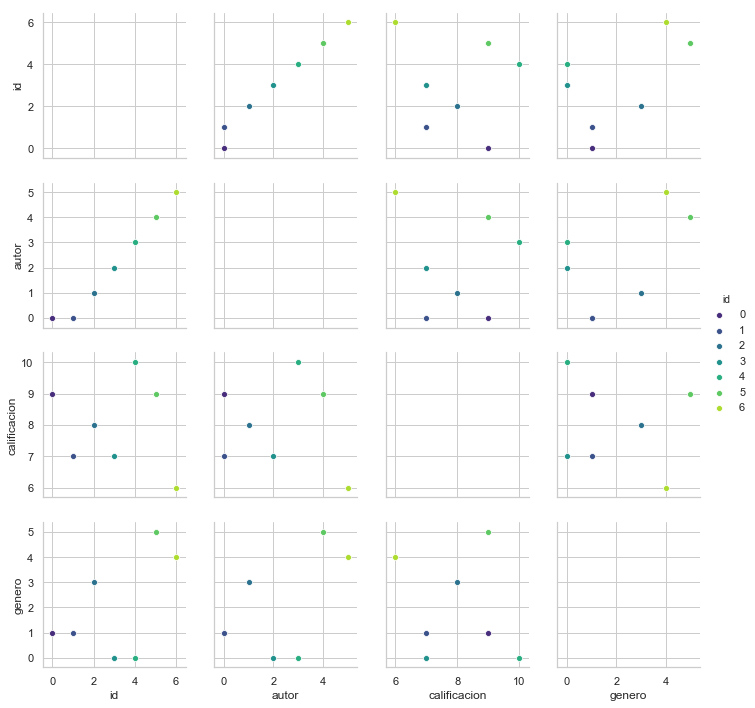

In [16]:
while True:
            command = str(input('''
                                ¿Qué deseas hacer?
                                [a]ñadir
                                [b]uscar libro
                                [l]istar libros
                                [m]ostrar autores
                                [mo]strar genero
                                [g]raficar
                                [s]alir
                                '''))

            if command == 'a':
                añadir()
                
            elif command == 'b':
                buscar()

            elif command == 'l':
                mostrarlibros()
                
            elif command == 'm':
                mostrarautor()
                
            elif command == 'mo':
                mostrargenero()
                
            elif command == 'g':
                graficar()
                
            elif command == 's':
                break
            else:
                print('Comando no encontrado.')